# This notebook looks at a data set and draws four conclusions that can be useful for FoodieX

FoodieX is Xtern's new food delivery service that caters to places to eat in Indianapolis. In this notebook I looked through over 2000 resturants to find useful information that the Xtern's can use to start this company.

In [544]:
#Importing useful libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns

In [523]:
#Read in dataset
data = pd.read_csv('2020-XTern-DS.csv')


### Changing the data set
- From the data set the minimim order coloumn does not provide any useful information. It doesn't make much since for most food types so I won't be using it to draw any conclusions from. Since this column isn't helpful im going to start off by dropping it in order to keep the data set clean.

In [527]:
#Drop Min Order column
data = data.drop(columns = ['Minimum_Order'])

In [528]:
#cleaning the data 

cleaned_data = data

cleaned_data = cleaned_data.replace({"NEW":np.nan})
cleaned_data = cleaned_data.replace({"-":np.nan})
cleaned_data = cleaned_data.replace({"Opening Soon":np.nan})
cleaned_data['Average_Cost'] = cleaned_data['Average_Cost'].str.replace('$','')
cleaned_data['Average_Cost'] = cleaned_data['Average_Cost'].str.replace(',','.')

cleaned_data = cleaned_data.dropna()

#sorting data by best ratings
cleaned_data = cleaned_data.sort_values(by = ['Rating'],ascending=False)


In [529]:
# Getting rid of the minutes in cook time and turing it into an integer so I can perform opperations on it
new_time = []
updated_time = []
for i in cleaned_data['Cook_Time']:
    new_time.append(i.rstrip(' minutes'))
    
for i in new_time:
    updated_time.append(int(i))

cleaned_data = cleaned_data.drop(columns = 'Cook_Time')
cleaned_data['Cook_Time'] = updated_time


In [530]:
#Chaning the data from objects to floats so I can use them in mathematical equations
cleaned_data['Rating'] = cleaned_data['Rating'].astype(float)
cleaned_data['Votes'] = cleaned_data['Votes'].astype(float)
cleaned_data['Reviews'] = cleaned_data['Reviews'].astype(float)
cleaned_data['Average_Cost'] = cleaned_data['Average_Cost'].astype(float)


#To calculate the best resturants I wanted to take into account the number of reviews and votes the 
#resturant recieves so I turned the score out of 5 into a percent and multiplied that by the  
#average number of votes/reviews the resturant recieved in order to have their scores be impacted more by 
#the amount of reviews/votes vs the overall rating. I also used a log scale to help balance out the amount of score
#To better reflect the rating

score = (cleaned_data['Rating'] / 5 * math.log(10)*((cleaned_data['Votes'] + cleaned_data['Reviews']) / 2))

cleaned_data['Score'] = score
cleaned_data = cleaned_data.sort_values(by = 'Score',ascending = False)
updated_data = cleaned_data.reset_index(drop = True)
updated_data.head(10)

,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Rating,Votes,Reviews,Cook_Time,Score
0,ID_1064,39.587777,-85.564805,"Continental, North Indian, BBQ, Steak",80.0,4.7,9054.0,6504.0,45,16837.100872
1,ID_1666,39.959980,-85.903329,"Mexican, American, Italian, Burger",50.0,4.6,4903.0,3989.0,65,9418.309858
2,ID_2885,39.543546,-85.186797,"German, Italian, Cafe",45.0,4.3,4691.0,2547.0,45,7166.427688
3,ID_2051,39.759886,-85.500507,"Italian, Continental, Chinese, Mexican, Fast F...",30.0,4.7,3975.0,2359.0,65,6854.749770
4,ID_2601,39.560512,-85.826137,"Bakery, Desserts, Sandwich",15.0,4.1,4606.0,2311.0,45,6530.062246
5,ID_6511,39.199394,-85.529664,"Street Food, Beverages",10.0,3.9,4438.0,2576.0,45,6298.629418
6,ID_4202,39.244727,-85.741670,"Parsi, Bakery",20.0,4.0,4335.0,2363.0,30,6169.085981
7,ID_4202,39.942907,-85.587784,"Parsi, Bakery",20.0,4.0,4335.0,2363.0,30,6169.085981
8,ID_8087,39.729100,-85.422667,"Chinese, Thai, Asian, Malaysian, Vietnamese, S...",60.0,4.2,3782.0,1948.0,30,5541.401285
9,ID_13,39.105630,-85.719512,"Continental, North Indian, Seafood, Cafe, Sala...",65.0,4.1,3860.0,1962.0,45,5496.316669


## Conclusion 1
- Based off of my log ranking system the top 10 trending resturants can be scene above.
    - The ranking system is takes the rating and makes it a percent out of 5. This value is then multipled by the log of the average number of votes and reviews to give the resturant a score. I did this in order to make sure that the rating is constent accross a wide group of people. This should help ensure that the rating is accurate.

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

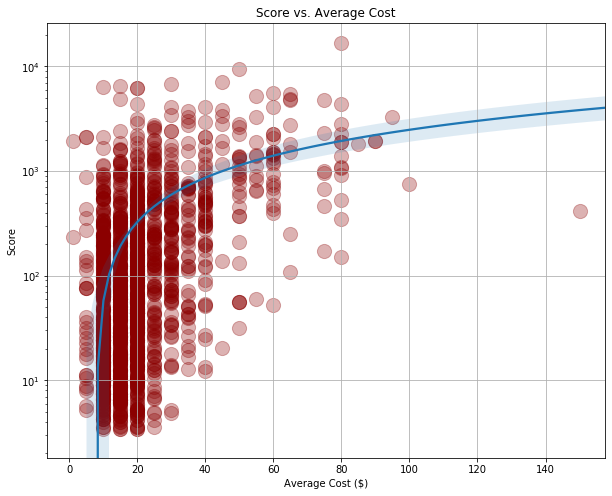

In [545]:
plt.figure(figsize = (10,8))
sns.regplot(updated_data['Average_Cost'],updated_data['Score'],scatter_kws={'color':'darkred','alpha':0.3,'s':200})
plt.title('Score vs. Average Cost')
plt.yscale('log')
plt.ylabel('Score')
plt.xlabel("Average Cost ($)")
plt.grid()
plt.tight_layout

## Conclusion 2
- Based on the plot above where the score of the resturant is against the average cost you can see that the cost of the food is slightly correlated to the the score. The highest scores are all around the price of $80. Also, no Bad score came from expensive resturants. From this graph we can see that cheap resturants can either have a very low score or a high score while expensive resturants have consistently high scores as you can see from the regression line.

In [541]:
%matplotlib inline 
import folium
#Plots how ever many resturants you want
def resturant_location(num_resturants):
    map_resturant = folium.Map(location=[39,-85],zoom_start=7.5)
    for i in range(0,num_resturants,1):
        folium.Marker([updated_data['Latitude'][i],updated_data['Longitude'][i]],popup = [updated_data['Cuisines'][i],updated_data['Rating'][i]],tooltip = updated_data['Restaurant'][i]).add_to(map_resturant)
        
    return map_resturant

 ## Map of all the resturants

In [542]:
resturant_location(50)

## Conclusion 3
- Based on the locations of the top 50 rated resturants its clear to see that FoodieX will need multiple locations to cover all of these resturatants. After looking at the data I recommend having a location in the following cities.
    - Greensburg
    - Rushville
    - New Castle
    - McCordsville
- I picked these locations because they are spread out over the best rated resturants and they are close to the express way which will help with completing orders in a timely fashion.

In [558]:
#Fucntion that searchs for any type of food you want and outputs average cost/cook time
def food_stats(food_type):
    food = food_type
    food_type = updated_data[updated_data['Cuisines'].str.contains(food_type)]
    print('The average cost of',food, 'is:',round(np.mean(food_type['Average_Cost']),2))
    print('The average cook time of',food,'is:',round(np.mean(food_type['Cook_Time']),2),)
    print()


In [559]:
food_stats('Fast Food')
food_stats('Indian')
food_stats('Chinese')
food_stats('Street Food')
food_stats('Pizza')
food_stats('Seafood')
food_stats('Italian')
food_stats('Healthy Food')

The average cost of Fast Food is: 18.15
The average cook time of Fast Food is: 38.36

The average cost of Indian is: 22.77
The average cook time of Indian is: 38.8

The average cost of Chinese is: 24.46
The average cook time of Chinese is: 39.36

The average cost of Street Food is: 15.04
The average cook time of Street Food is: 38.08

The average cost of Pizza is: 25.76
The average cook time of Pizza is: 38.06

The average cost of Seafood is: 32.19
The average cook time of Seafood is: 41.09

The average cost of Italian is: 37.12
The average cook time of Italian is: 42.48

The average cost of Healthy Food is: 24.09
The average cook time of Healthy Food is: 40.11



## Conclusion 4
Based off of the food stats for the cheapest food is Street Food and the most expensive is Italian and Seafood. The quickest food types are street food and pizza. The slowest food options are italian and seafood.